# SVM Support Vector Machine Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('..\data\mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.shape

(400, 3)

In [5]:
# null values
df.isnull().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

In [6]:
# duplicate data
df.duplicated(subset=None).sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Med_1_mL,400.0,5.447984,2.319059,1.0,3.249062,5.393776,7.630389,10.0
Med_2_mL,400.0,5.616750,2.336637,1.0,3.431311,5.638471,7.782614,10.0
Virus Present,400.0,0.500000,0.500626,0.0,0.000000,0.500000,1.000000,1.0


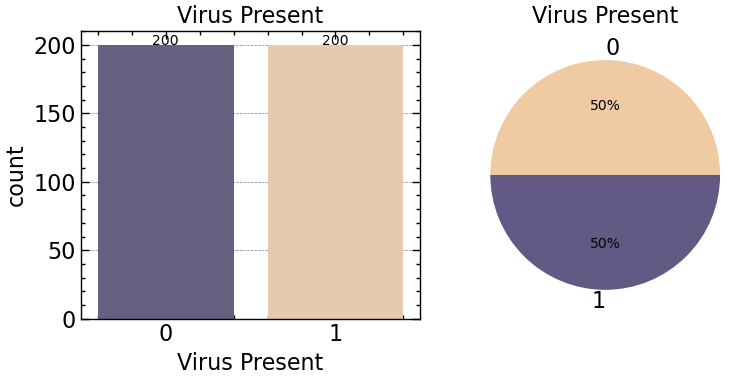

In [8]:
plt.style.use(['science','notebook','grid'])

variable = 'Virus Present'

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

ax = sns.countplot(x=variable , data= df, palette=['#635985','#F0CAA3'] )

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height, 
            s = '{:.0f}'.format(height), 
            ha = 'center'
           )
plt.title(variable)

# pie chart

plt.subplot(1,2,2)
counts = df[variable].value_counts()
colors = sns.color_palette(['#F0CAA3','#635985'])
plt.pie(counts, labels = counts.index, colors= colors, autopct='%0.f%%')
plt.title(variable)

plt.tight_layout()
plt.show()

In [9]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

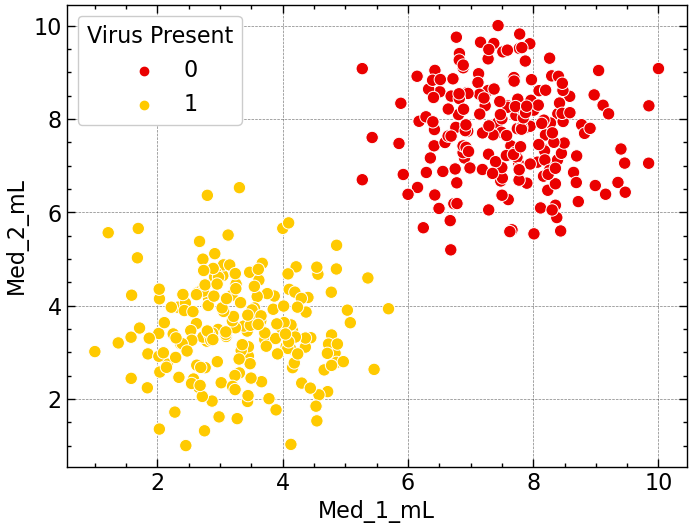

In [10]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', data=df, hue='Virus Present', s= 80, palette='hot');

**Create X and y**

In [11]:
X = df.drop('Virus Present', axis = 1)
y = df['Virus Present']

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state= 42)

## Scale Data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [26]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

## Crate Model | GridSearchCV

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [18]:
svm = SVC()

In [19]:
param_grid = {'C' : [0.01, 0.1,1], 
              'kernel' : ['linear', 'poly', 'rbf'], 
              'gamma' : ['scale','auto'],
              'degree' :[1,2,3,4]
             }

In [20]:
grid_svm = GridSearchCV(svm, param_grid, cv=5)

In [21]:
grid_svm.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'degree': [1, 2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [22]:
grid_svm.best_estimator_

SVC(C=0.01, degree=1, kernel='linear')

In [23]:
grid_svm.best_estimator_.get_params()

{'C': 0.01,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [24]:
grid_svm.best_score_

1.0

In [27]:
predict = grid_svm.predict(X_test_scaler)

## Evaluation Metrics

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [29]:
confusion_matrix(y_test, predict)

array([[33,  0],
       [ 0, 27]], dtype=int64)

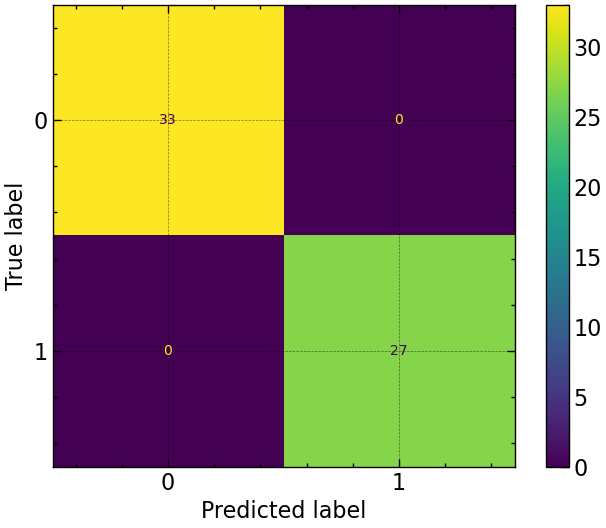

In [30]:
ConfusionMatrixDisplay.from_estimator(grid_svm, X_test_scaler, y_test);

In [31]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        27

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [32]:
accuracy_score(y_test, predict)

1.0